# __Análise de componentes principais - PCA__
### __Analisando todas as músicas coletadas__

Nessa parte do trabalho, iremos utilizar o algoritmo de análise de componentes principais conjuntamente sobre o banco de dados de músicas provenientes de três grupos: 

__1. Grupo 1:__ músicas famosas no TikTok, sendo esta base obtida do kaggle.

__2. Grupo 2:__ músicas famosas porém não populares na plataforma do TikTok, tendo sido essas músicas coletadas pelo grupo.

__2. Grupo 3:__ músicas não famosas, e que também não são populares na plataforma do TikTok, coletadas pelo grupo.


In [1]:
#importando bibliotecas
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importando as bases de dados
df_pop_tiktok = pd.read_csv('../data/numeric_columns.csv')
df_nao_pop = pd.read_csv('../data/nao_pop.csv')
df_pop_not_tiktok = pd.read_csv('../data/populares_mas_nao_no_tiktok_numeric.csv')

#coluna p/distinguir origem da musica 
df_pop_tiktok['base'] = 1
df_nao_pop['base'] = 2
df_pop_not_tiktok['base'] = 3

#juntando as bases
df = pd.concat([df_pop_tiktok, df_nao_pop], ignore_index=True)
df = pd.concat([df_pop_not_tiktok, df], ignore_index=True)

#removendo algumas colunas
del df['duration']
del df['mode']

df.head()

,track_id,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year,base
0,5u1n1kITHCxxp8twBcZxWy,73,0.673,0.704,6,-8.056,0.3600,0.196000,0.000000,0.0898,0.372,86.919,3.534883,2020,3
1,09CtPGIpYB4BrO8qb1RGsF,82,0.654,0.760,0,-3.669,0.0450,0.079700,0.000000,0.2990,0.410,99.945,3.346433,2015,3
2,4B0JvthVoAAuygILe3n4Bs,78,0.845,0.567,5,-8.118,0.0956,0.590000,0.001420,0.0811,0.793,125.020,3.428000,2015,3
3,190jyVPHYjAqEaOGmMzdyk,74,0.602,0.843,0,-4.831,0.0593,0.000688,0.000053,0.0682,0.526,128.003,3.799767,2012,3
4,5GYbkDveRD2I8M5ZJ14hWn,72,0.739,0.807,0,-5.063,0.0652,0.018100,0.000000,0.2950,0.632,97.048,3.797550,2011,3


In [3]:
#tranformando o df em matrix
db_matrix = np.matrix(df.iloc[:, 2:14])
db_matrix

matrix([[6.73000000e-01, 7.04000000e-01, 6.00000000e+00, ...,
         8.69190000e+01, 3.53488333e+00, 2.02000000e+03],
        [6.54000000e-01, 7.60000000e-01, 0.00000000e+00, ...,
         9.99450000e+01, 3.34643333e+00, 2.01500000e+03],
        [8.45000000e-01, 5.67000000e-01, 5.00000000e+00, ...,
         1.25020000e+02, 3.42800000e+00, 2.01500000e+03],
        ...,
        [4.93000000e-01, 8.46000000e-01, 2.00000000e+00, ...,
         1.34966000e+02, 3.21730000e+00, 2.02200000e+03],
        [6.97000000e-01, 6.86000000e-01, 1.00000000e+01, ...,
         1.35022000e+02, 5.45646667e+00, 2.01600000e+03],
        [6.02000000e-01, 8.80000000e-01, 4.00000000e+00, ...,
         1.29998000e+02, 3.29230000e+00, 2.02100000e+03]])

In [4]:
from sklearn.preprocessing import StandardScaler

#normalizando os dados
db_matrix = np.asarray(db_matrix)
matrix_norm = StandardScaler().fit_transform(db_matrix)

#agora a média de todas as colunas é praticamente zero
matrix_norm.mean(0)

array([-6.54030420e-16, -4.90522815e-16, -7.56222673e-17,  1.63507605e-17,
       -1.63507605e-17, -6.54030420e-17, -6.54030420e-17,  7.00016934e-17,
       -8.58414926e-17, -1.14455323e-16, -9.81045630e-17, -4.36565305e-15])

In [5]:
matrix_norm = np.asarray(matrix_norm)

In [6]:
#importando o módulo de PCA
from sklearn.decomposition import PCA

#primeiro, vamos observar todos componentes principais 
pca = PCA(n_components = 12)

In [7]:
#rodando o PCA
pca.fit(matrix_norm)

PCA(n_components=12)

In [8]:
#componentes obtidos
np.round(pca.explained_variance_ratio_,3)

array([0.209, 0.155, 0.096, 0.089, 0.085, 0.083, 0.067, 0.067, 0.051,
       0.046, 0.033, 0.02 ])

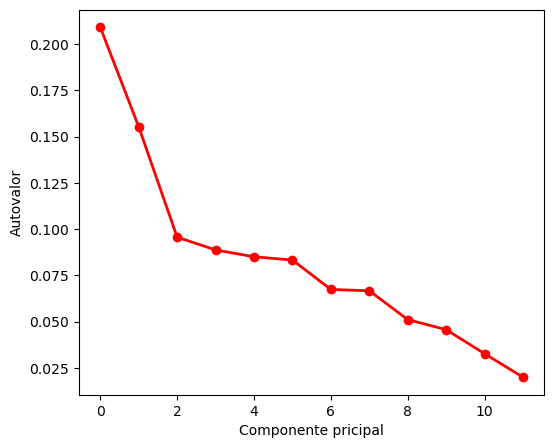

In [9]:
fig = plt.figure(figsize=(6, 5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Componente pricipal')
plt.ylabel('Autovalor')

plt.show()

In [10]:
#soma cumulativa dos componentes
pca.explained_variance_ratio_.cumsum()

array([0.20912822, 0.36440056, 0.45999767, 0.54870389, 0.63371808,
       0.7169487 , 0.78428721, 0.85089441, 0.90192306, 0.94752734,
       0.98012566, 1.        ])

A partir desse resultado, concluímos que pelo menos 5 componentes principais devem ser usadas para explicar cerca de 64% da variabilidade dos dados.

In [11]:
import plotly.express as px

#visualizando resultados

components = pca.fit_transform(matrix_norm)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["base"],
    opacity = 0.5
)
fig.update_traces(diagonal_visible=False)
fig.show()

Nos gráficos plotados, vemos uma diferença entre o grupo 1 e 2, correspondendo eles às músicas populares no TikTok, e as não populares, respectivamente. Já quanto ao grupo 3, que representa músicas populares que não foram para o TikTok, é difícil tirar conclusões pois ele está pouco visível no gráfico. Por isso, vamos plotar a seguir somente os grupos 1 e 3, que correspondem a todas músicas populares usadas na análise.

In [12]:
#selecionando grupos 1 e 3
df_pop = pd.concat([df_pop_tiktok, df_pop_not_tiktok], ignore_index=True)
matrix_pop = np.asarray(df_pop.iloc[:,2:14])
matrix_pop = StandardScaler().fit_transform(matrix_pop)

In [13]:
#visualizando resultados mais detalhadamente
components = pca.fit_transform(matrix_pop)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df_pop["base"],
    opacity = 0.5
)
fig.update_traces(diagonal_visible=False)
fig.show()

O grupo 1, que está em azul, são as músicas populares no TikTok, já os pontos amarelos são as músicas populares que não fizeram sucesso no TikTok. A partir desse resultado podemos inferir que as músicas populares aqui estudadas, tendo elas feito sucesso no TikTok ou não, são muito parecidas entre si. Por fim, vamos plotar os grupos de músicas populares no TikTok versus as músicas não populares.

In [14]:
#selecionando grupos 1 e 2
df_pop_and_not_pop = pd.concat([df_pop_tiktok, df_nao_pop], ignore_index=True)
matrix_12 = np.asarray(df_pop_and_not_pop.iloc[:,2:14])
matrix_12 = StandardScaler().fit_transform(matrix_12)

In [15]:
#visualizando resultados mais detalhadamente
components = pca.fit_transform(matrix_12)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df_pop_and_not_pop["base"],
    opacity = 0.5
)
fig.update_traces(diagonal_visible=False)
fig.show()

Podemos concluir que a única diferença capturada pelo PCA é a entre as músicas populares e não populares. Agora vamos observar os pesos das variáveis nas componentes principais, para poder entender melhor de onde vem essa diferença.

In [16]:
print("As colunas usadas no PCA são:", list(df.iloc[:,2:14].columns.values))

As colunas usadas no PCA são: ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'release_year']


In [17]:
print("Primeira componente principal:" , np.round(pca.components_[0, :],3))
print("Segunda componente principal:" , np.round(pca.components_[1, :],3))
print("Terceira componente principal:" , np.round(pca.components_[2, :],3))

Primeira componente principal: [ 0.422  0.408 -0.43  -0.047 -0.074  0.026  0.317  0.349 -0.424 -0.086
  0.085 -0.213]
Segunda componente principal: [-0.193 -0.286 -0.434 -0.062 -0.578  0.065 -0.132  0.303  0.208 -0.101
 -0.426 -0.075]
Terceira componente principal: [-0.036  0.053 -0.051  0.684 -0.108 -0.693 -0.044  0.058  0.067 -0.077
  0.096 -0.095]


A primeira componente tem como variável de maior peso a __dançabilidade.__

A segunda componente tem como variável de maior peso a __energia.__

__O que isso sugere?__ 

É importante pontuar que como base de músicas não populares foi escolhida uma playlist de músicas góticas/punk pouco conhecidas. Além de estarem dentro de um nicho específico, essas músicas estão fora do que a sociedade ocidental tem como padrão de músicas comerciais, muito menos como músicas dançantes comerciais. Por exemplo, a maioria das rádios/festas raramente tocam músicas góticas. Não por acaso que os atritutos de dançabilidade e energia foram os que tiverem mais peso nas componentes principais, afinal, as músicas góticas não são percebidas como dançantes, e pelo contrário, muitas vezes se diferenciam pelo teor soturno e tristonho. 